In [36]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats
from scipy.stats import skew


# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Datos
# ==============================================================================
datos = pd.read_csv('DataPadel.csv', sep=';', encoding='ISO-8859-1')
print(datos.info())
datos.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nombre                 100 non-null    object 
 1   Ranking                100 non-null    int64  
 2   Puntuacion             100 non-null    int64  
 3   Comapanero             100 non-null    object 
 4   Posicion               100 non-null    object 
 5   LugarNacimiento        100 non-null    object 
 6   FechaNacimiento        100 non-null    object 
 7   Altura                 100 non-null    object 
 8   Residencia             100 non-null    object 
 9   PartidosJugados        100 non-null    int64  
 10  PartidosGanados        100 non-null    int64  
 11  PartidosPerdidos       100 non-null    int64  
 12  Rendimiento            100 non-null    float64
 13  Racha                  100 non-null    int64  
 14  2020_PartidosJugados   100 non-null    object 
 15  2020_Pa

,Nombre,Ranking,Puntuacion,Comapanero,Posicion,LugarNacimiento,FechaNacimiento,Altura,Residencia,PartidosJugados,...,2014_Rendimiento,2014_Torneos ganados,2014_Finales,2013_PartidosJugados,2013_PartidosGanados,2013_PartidosPerdidos,2013_Rendimiento,2013_Torneos ganados,2013_Finales,Circuito
0,Francisco Navarro Compán,1,12010,Pablo Lima,Revés,Sevilla,10/02/1989,"1,81",Madrid,407,...,0.76,2,1,50,32,18,0.64,0,0,Masculino
1,Juan Lebrón Chincoa,2,11330,Alejandro Galán Romo,Revés,Puerto de Sta. María,30/01/1995,"1,84",Madrid,302,...,0.5454545454545454,0,0,15,5,10,0.3333333333333333,0,0,Masculino
2,Alejandro Galán Romo,3,11100,Juan Lebrón Chincoa,Revés,Madrid,15/05/1996,"1,86",Madrid,287,...,0.5,0,0,?,?,?,?,?,?,Masculino
3,Pablo Lima,4,10860,Francisco Navarro Compán,Drive,Porto Alegre - Bra,11/10/1986,"1,8",Bilbao,423,...,0.8076923076923077,2,5,82,68,14,0.8292682926829268,4,10,Masculino


Histograma --> 

Uno de los métodos gráficos más empleados para el análisis de normalidad consiste en representar los datos mediante un histograma y superponer la curva de una distribución normal con la misma media y desviación estándar que los datos disponibles.


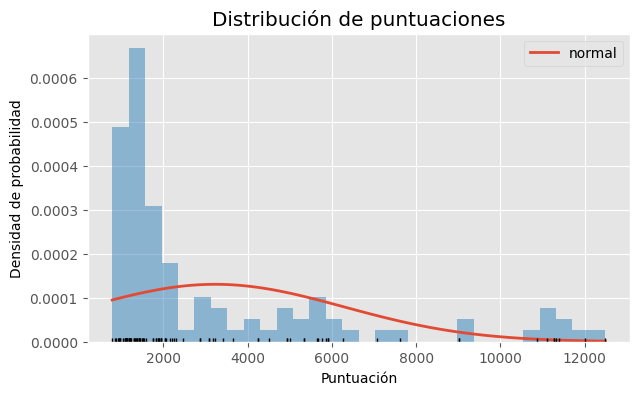

In [38]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(datos['Puntuacion'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(datos['Puntuacion']), max(datos['Puntuacion']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=datos['Puntuacion'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(datos['Puntuacion'], np.full_like(datos['Puntuacion'], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución de puntuaciones')
ax.set_xlabel('Puntuación')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();


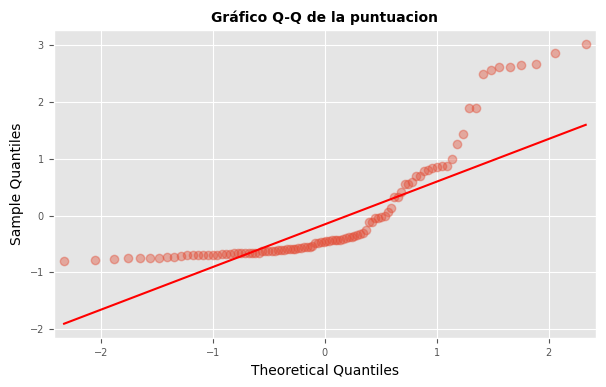

In [39]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    (datos['Puntuacion']),
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de la puntuacion', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

In [40]:

datos['Altura'] = datos['Altura'].str.replace(',', '')
datos['Altura'] = datos['Altura'].apply(lambda x: str(x) + '0' if len(str(x)) == 2 else x)
datos['Altura'] = datos['Altura'].astype(float).apply(round).astype(int)


In [41]:
mask = datos['Altura'] < 50
datos = datos.drop(index=datos[mask].index)


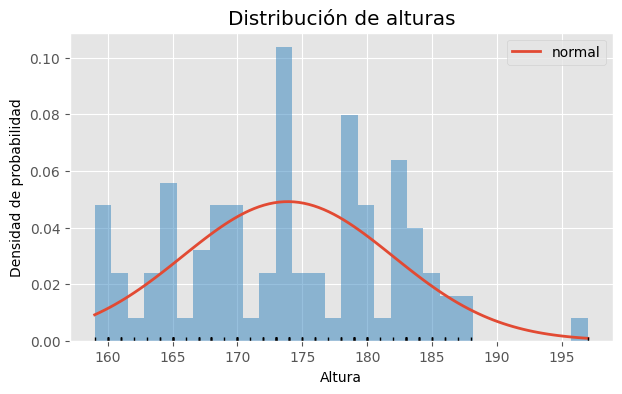

In [42]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(datos['Altura'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(datos['Altura']), max(datos['Altura']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=datos['Altura'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(datos['Altura'], np.full_like(datos['Altura'], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución de alturas')
ax.set_xlabel('Altura')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();


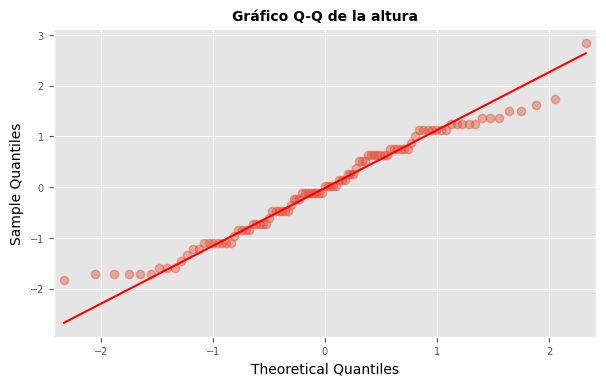

In [43]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    (datos['Altura']),
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de la altura', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

<Axes: xlabel='Altura'>

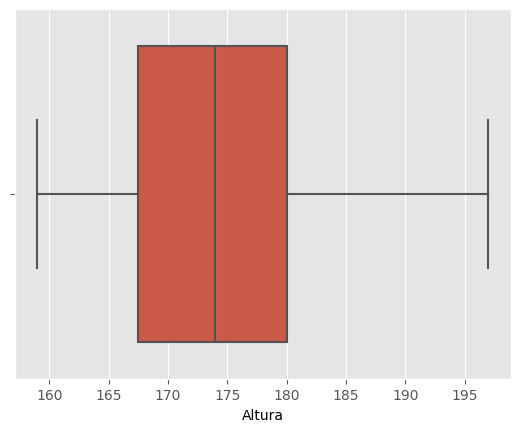

In [44]:
datos['Altura'] = datos['Altura'].astype(float)
sns.boxplot(x=datos['Altura'])

In [45]:
resumen = datos['Altura'].describe()
print(resumen)


count     99.000000
mean     173.878788
std        8.156971
min      159.000000
25%      167.500000
50%      174.000000
75%      180.000000
max      197.000000
Name: Altura, dtype: float64


In [46]:
# suponiendo que tus datos están almacenados en un DataFrame llamado 'datos'
mediana = datos['Altura'].median()


D1=mediana-167
D2=180-mediana
print('La mediana de los datos es:', mediana)
print('La diferencia entre Q1 y la mediana es', D1)
print('La diferencia entre Q3 y la mediana es' , D2)
print('Hay un 1 cm de diferencia')


La mediana de los datos es: 174.0
La diferencia entre Q1 y la mediana es 7.0
La diferencia entre Q3 y la mediana es 6.0
Hay un 1 cm de diferencia


In [47]:


asimetria_altura = skew(datos['Altura'])
print("Asimetría Altura:", asimetria_altura)

Asimetría Altura: 0.05524114593872991


El resultado obtenido de la asimetría (skewness) de la variable Altura es de 0.055. La asimetría es una medida de la falta de simetría en una distribución de datos. Si la distribución es simétrica, entonces la asimetría es igual a cero. Un valor positivo indica que la distribución tiene una cola positiva (es decir, tiene más valores a la derecha de la media), mientras que un valor negativo indica que la distribución tiene una cola negativa (es decir, tiene más valores a la izquierda de la media).

En este caso, como la asimetría de la Altura es positiva y cercana a cero, se podría decir que la distribución es ligeramente asimétrica hacia la derecha, pero en general es bastante simétrica. Esto significa que los valores más altos de altura son menos comunes que los valores más bajos, pero la diferencia no es muy grande.
